In [12]:
# Date Fruit Type Detection using YOLOv11
## Objective
# Build an object detection model to classify different types of date fruits using fused YOLOv11 
import os

data_path = r"C:\Users\me.com\Documents\deepLearning\project\images\images"
splits = ['images', 'test']

for split in splits:
    image_dir = os.path.join(data_path, split)
    num_images = len([f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')])
    print(f"{split.capitalize()} images: {num_images}")

Images images: 438
Test images: 120


In [13]:
import os
from collections import Counter

splits = ['trainsync']
label_path = r"C:\Users\me.com\Documents\deepLearning\project\images\images\labels"
class_counts = Counter()

split_dir = os.path.join(label_path)
for file in os.listdir(split_dir):
    if file.endswith(".txt"):
        with open(os.path.join(split_dir, file), 'r') as f:
            for line in f:
                class_id = line.strip().split()[0] # Convert to int
                class_counts[class_id] += 1

class_names = {
    0: "Ajwa",
    1: "Medjool",
    2: "Meneifi",
    3: "Nabtat Ali",
    4: "Shaishe",
    5: "Sokari",
    6: "Sugaey"
}

print("\nClass Frequency Distribution:")
for class_id, count in class_counts.items():
    class_name = class_names.get(class_id, f"Class {class_id}")
    print(f"{class_name}: {count}")


Class Frequency Distribution:
Class 0: 74
Class 1: 43
Class 3: 53
Class 5: 84
Class 6: 48
Class 4: 59
Class 2: 72


In [42]:
import sys, pathlib
inner = pathlib.Path("..").resolve() / "ultralytics" / "ultralytics"
sys.path.insert(0, str(inner.parent))   # add its *parent*
from ultralytics import YOLO  



In [ ]:
'''best model performance cbam'''


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load your trained model
results = YOLO('C:/Users/me.com/Documents/deepLearning/project/date-fruit-classification/runs/detect/cbam_yolo11_last/weights/best.pt')

# Evaluate on the test set
metrics = model.val(
    data='C:/Users/me.com/Documents/deepLearning/project/date-fruit-classification/dataset.yaml',
    split='test'  # use test split
)

# Print metrics
print(results)
if hasattr(results, 'confusion_matrix') and results.confusion_matrix is not None:
    cm = results.confusion_matrix.matrix
    class_names = results.names

    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Confusion matrix not available!")

# Step 5: Plot PR curves (Precision-Recall)
# These are usually saved during validation, so we access them

try:
    pr_curves = results.plots['pr']
    if pr_curves:
        pr_curves.show()
except Exception as e:
    print("PR curves not available:", e)

# Step 6: Plot F1 curve (confidence vs F1)
try:
    f1_curve = results.plots['f1']
    if f1_curve:
        f1_curve.show()
except Exception as e:
    print("F1 curve not available:", e)


WARNING  C:/Users/me.com/Documents/deepLearning/project/date-fruit-classification/runs/detect/cbam_yolo11_last/weights/best.pt appears to require 'ultralytics.ultralytics', which is not in Ultralytics requirements.
AutoInstall will run now for 'ultralytics.ultralytics' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolo11n.pt'
Ultralytics 8.3.111  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA T1200 Laptop GPU, 4096MiB)
val: Fast image access  (ping: 0.00.0 ms, read: 1846.51144.7 MB/s, size: 2006.6 KB)


val: Scanning C:\Users\me.com\Documents\deepLearning\project\date-fruit-classification\data\processed\labels\valnew.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:27<00:00,  3.98s/it]


                   all        100        281      0.928      0.566      0.662      0.507
                  Ajwa         24        143      0.934     0.0909      0.231      0.108
               Medjool         10         46       0.97      0.152      0.232      0.193
               Meneifi         17         17      0.919      0.669      0.876      0.622
            Nabtat Ali          9          9          1       0.88      0.984      0.761
               Shaishe         15         15      0.854        0.8       0.85      0.671
                Sokari         18         44          1      0.369      0.484      0.393
                Sugaey          7          7      0.816          1      0.978      0.805
Speed: 0.8ms preprocess, 199.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\val8
YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  

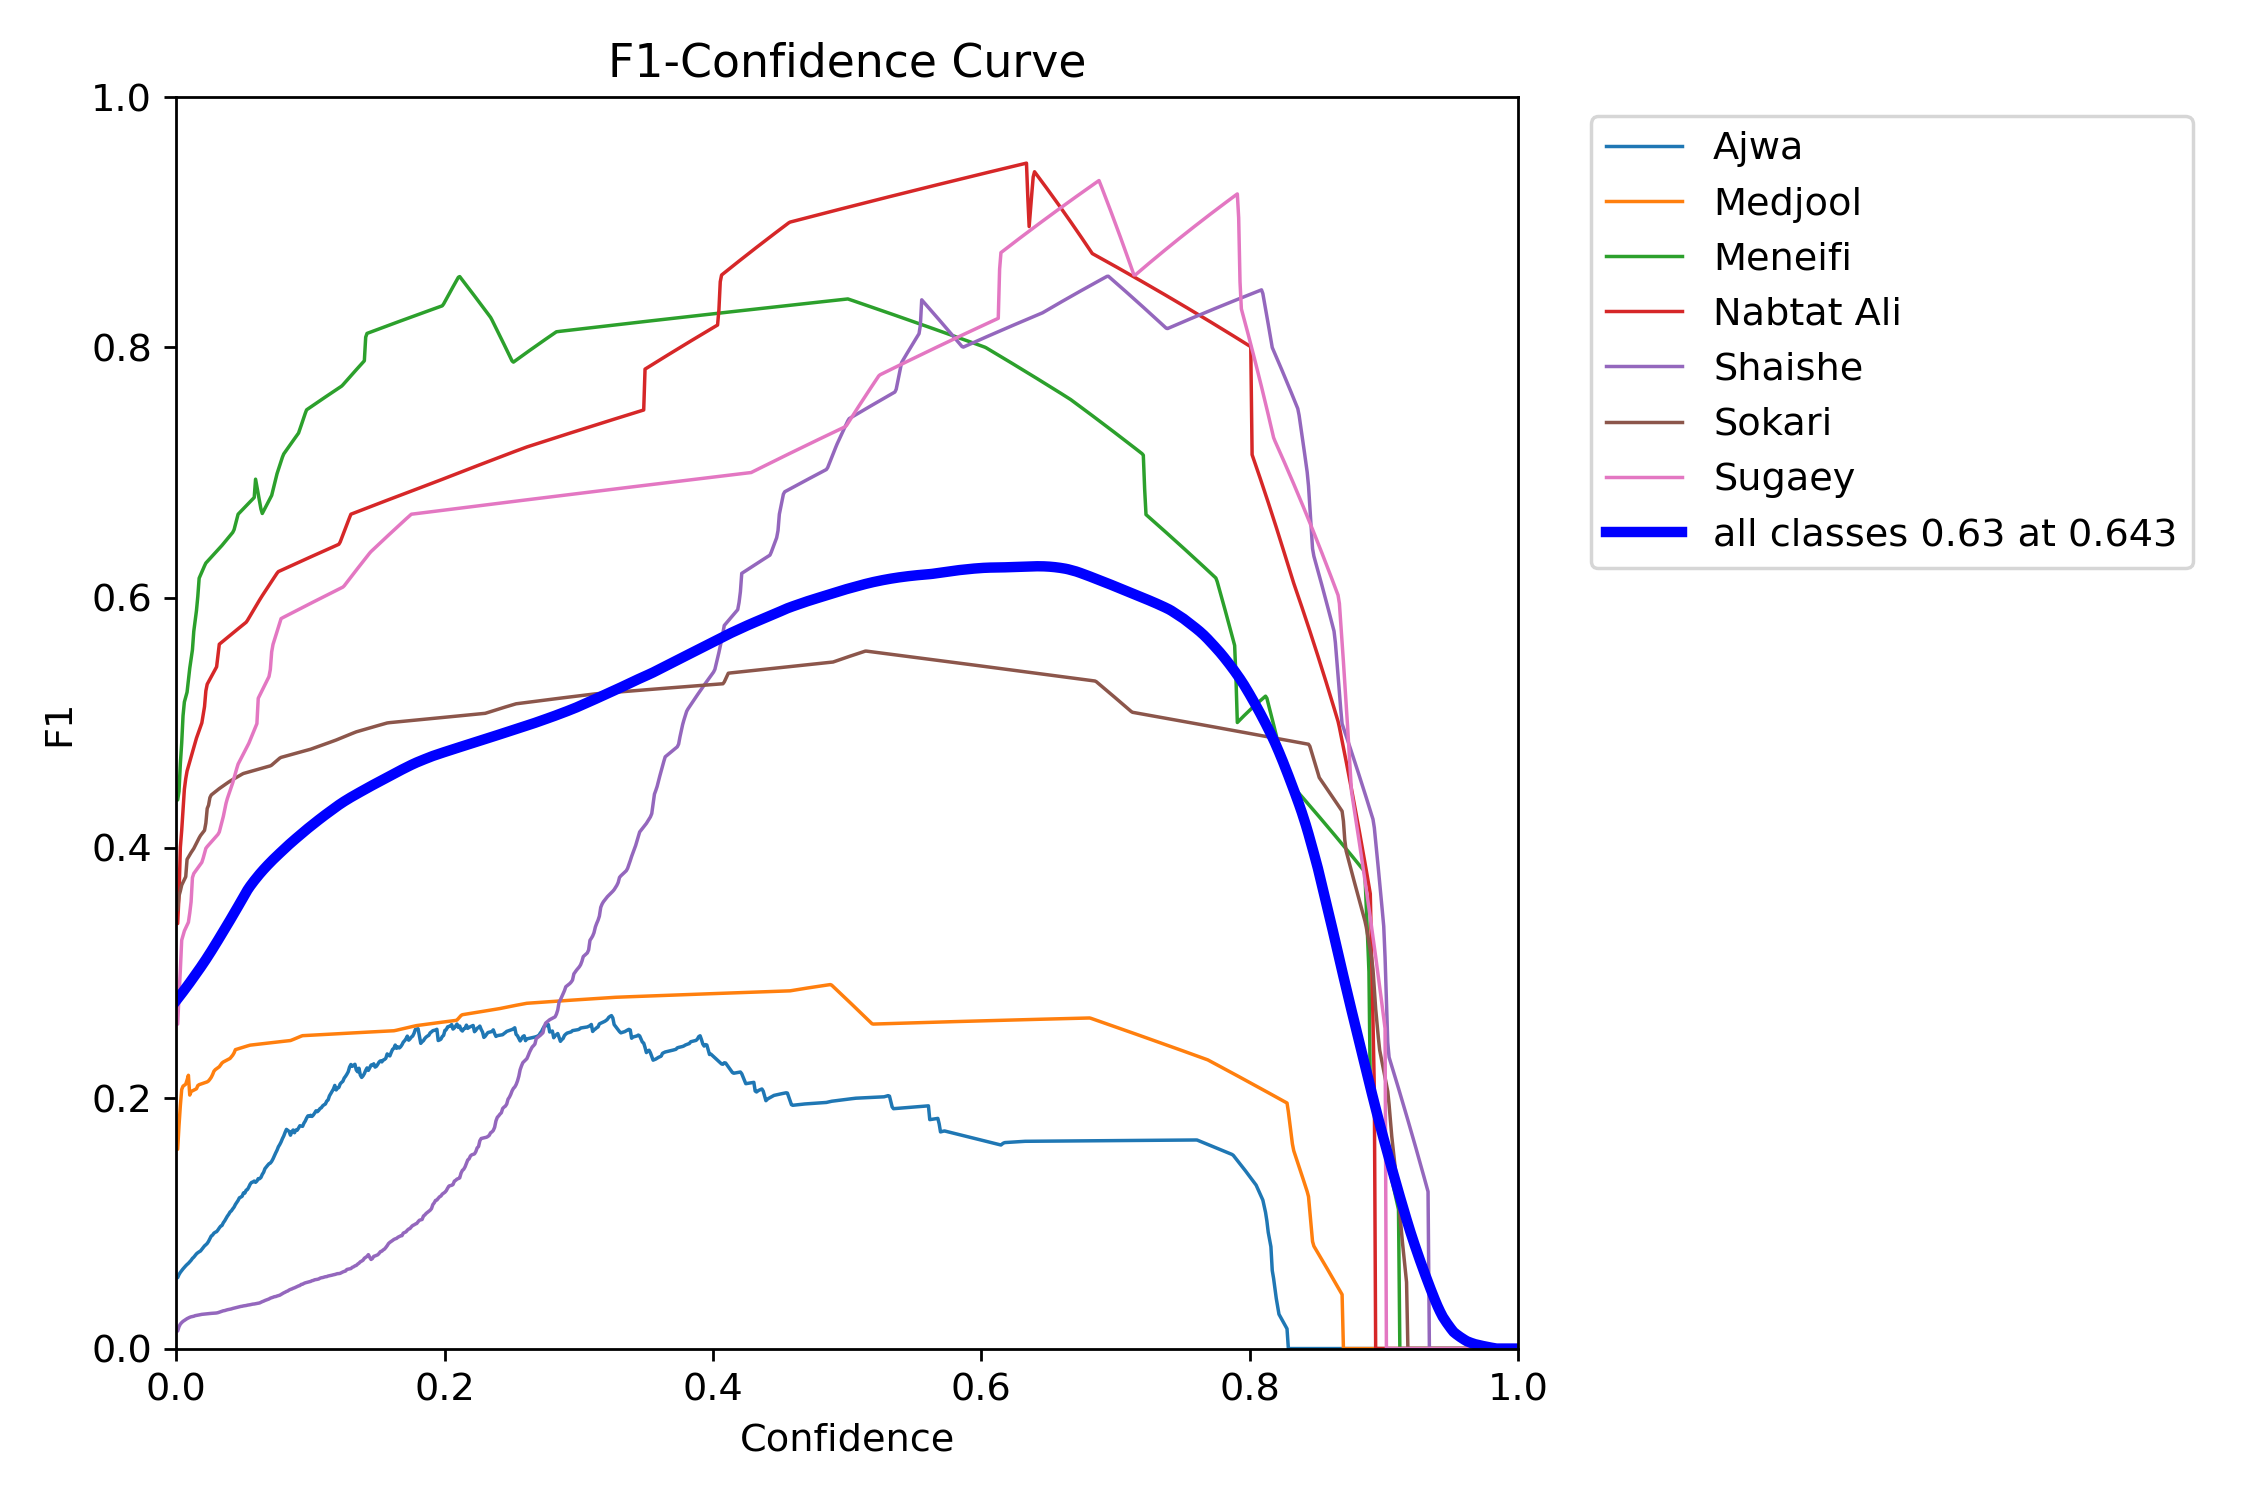

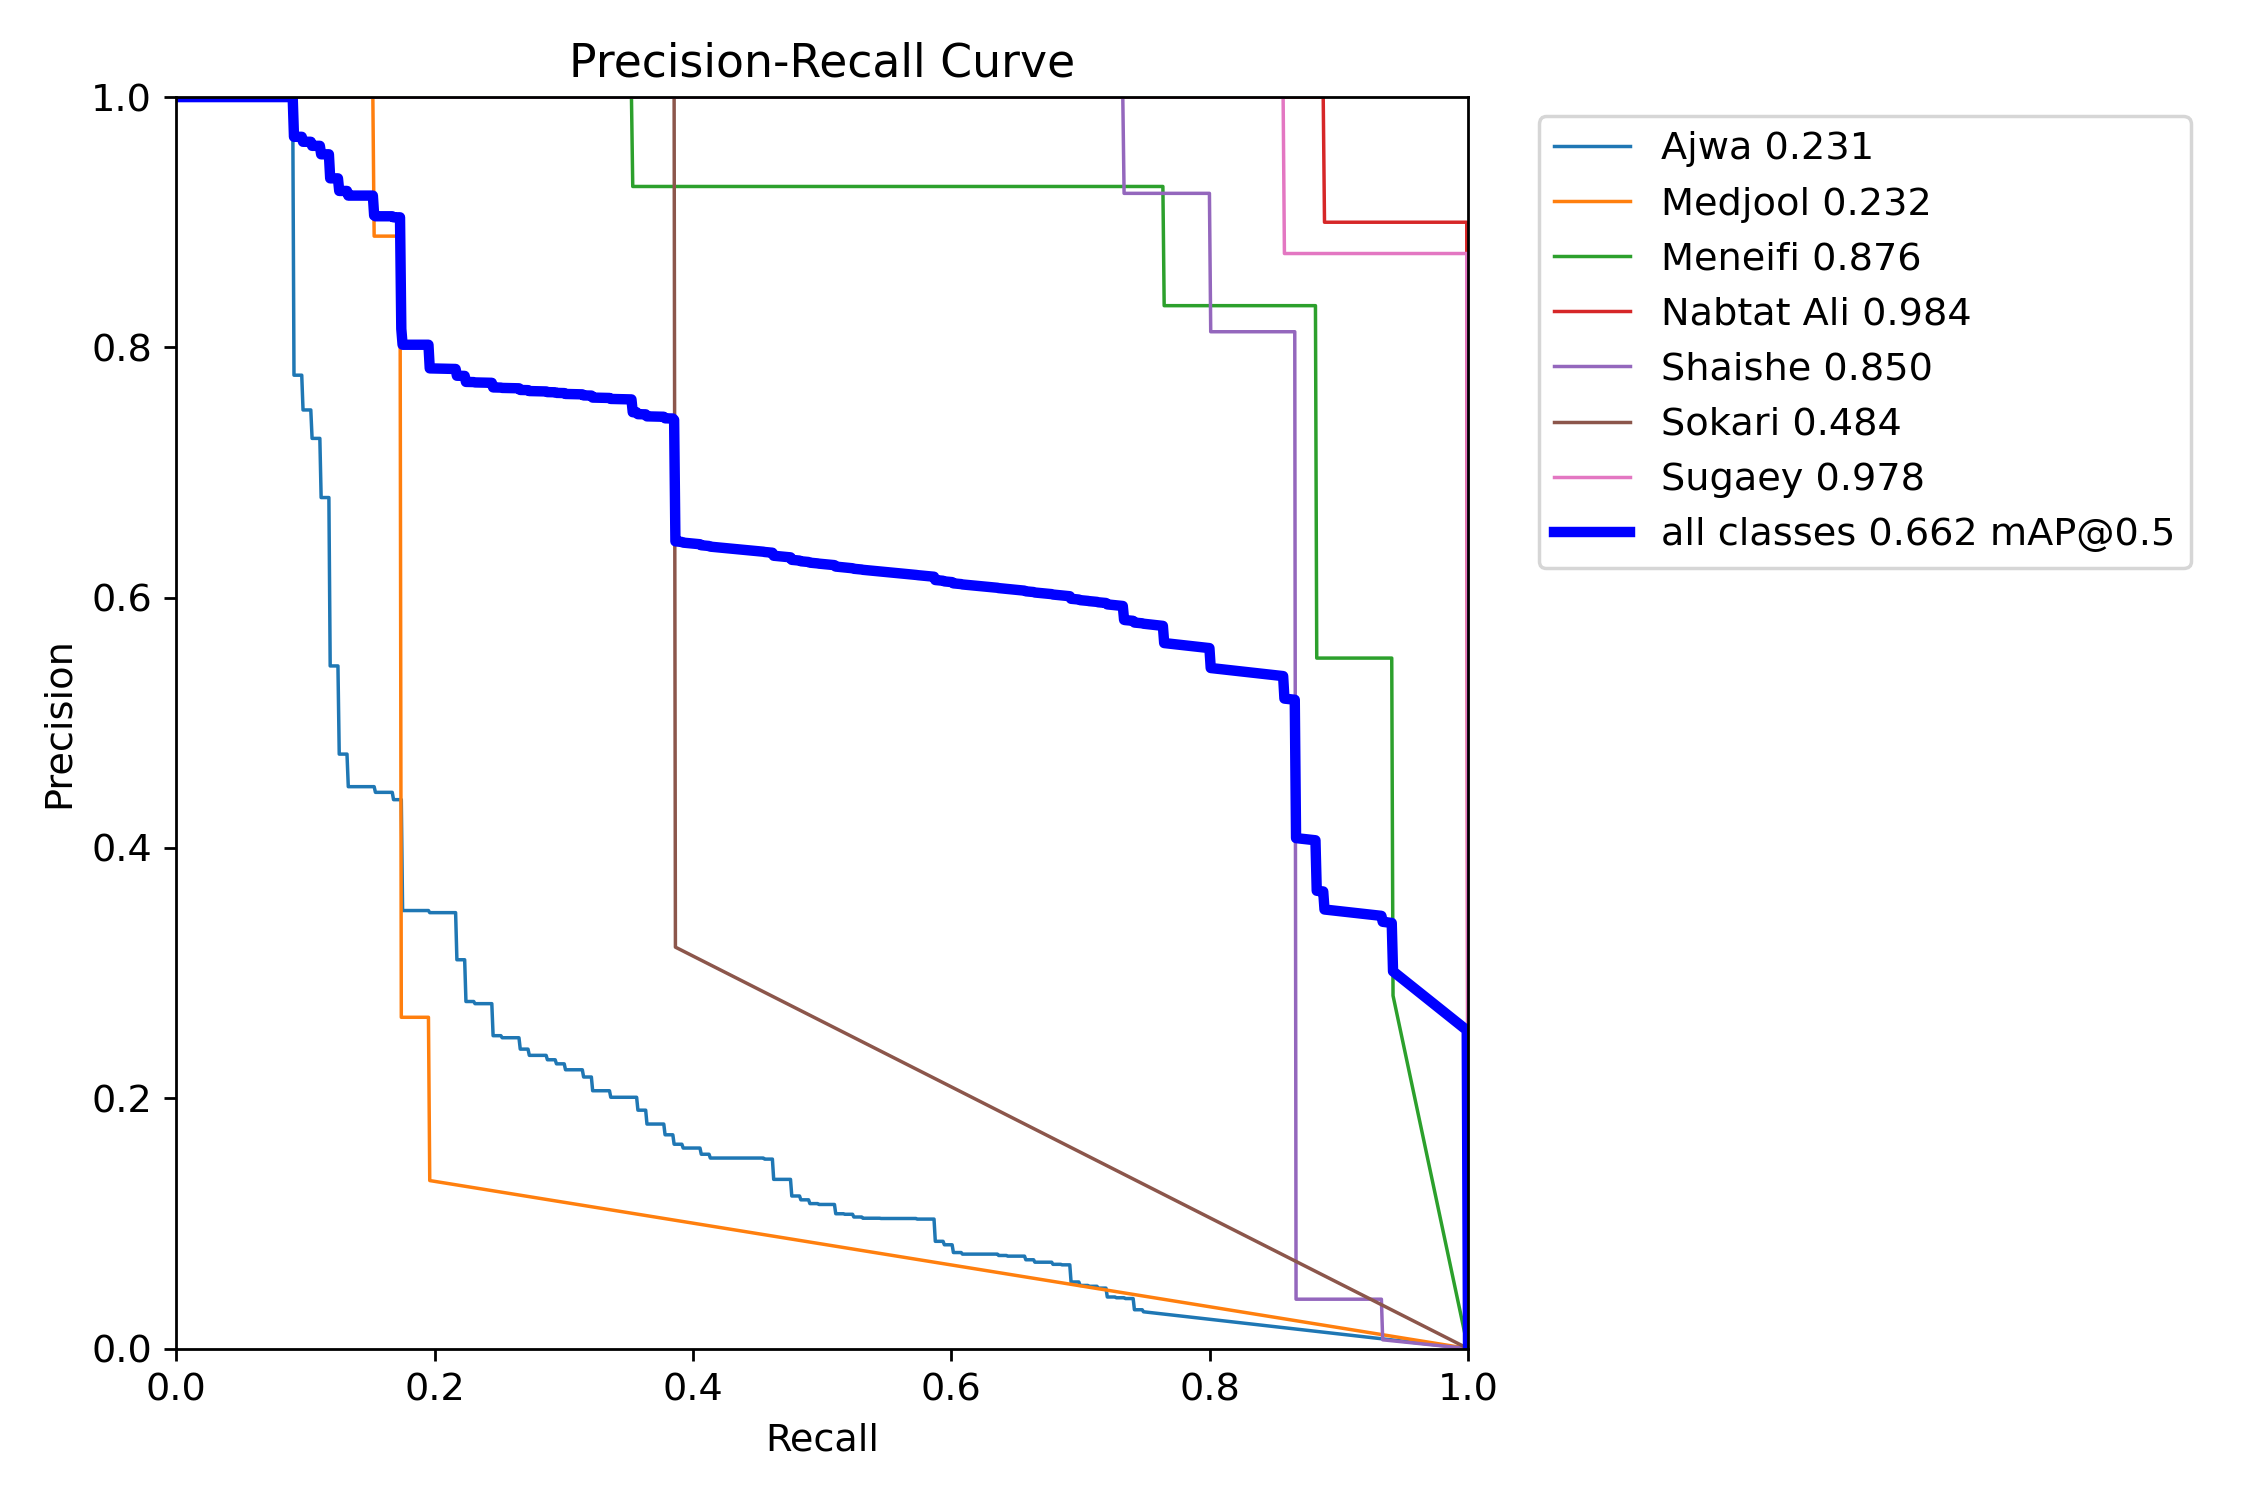

In [52]:
from IPython.display import Image, display
import glob
result_path = 'runs/detect/val8/'  # adjust if your run folder is different

# Show important images

display(Image(filename=result_path + 'F1_curve.png'))
display(Image(filename=result_path + 'PR_curve.png'))

In [49]:
'''Base model'''



import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load your trained model
results2 = YOLO('C:/Users/me.com/Documents/deepLearning/project/date-fruit-classification/runs/detect/train11/weights/best.pt')

# Evaluate on the test set
metrics = model.val(
    data='C:/Users/me.com/Documents/deepLearning/project/date-fruit-classification/dataset.yaml',
    split='test'  # use test split
)

# Print metrics
print(results2)
if hasattr(results, 'confusion_matrix') and results.confusion_matrix is not None:
    cm = results.confusion_matrix.matrix
    class_names = results.names

    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Confusion matrix not available!")

# Step 5: Plot PR curves (Precision-Recall)
# These are usually saved during validation, so we access them

try:
    pr_curves = results2.plots['pr']
    if pr_curves:
        pr_curves.show()
except Exception as e:
    print("PR curves not available:", e)

# Step 6: Plot F1 curve (confidence vs F1)
try:
    f1_curve = results.plots['f1']
    if f1_curve:
        f1_curve.show()
except Exception as e:
    print("F1 curve not available:", e)


WARNING  C:/Users/me.com/Documents/deepLearning/project/date-fruit-classification/runs/detect/train11/weights/best.pt appears to require 'ultralytics.ultralytics', which is not in Ultralytics requirements.
AutoInstall will run now for 'ultralytics.ultralytics' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolo11n.pt'
Ultralytics 8.3.111  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA T1200 Laptop GPU, 4096MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 2.00.6 MB/s, size: 16.5 KB)


val: Scanning C:\Users\me.com\Documents\deepLearning\project\date-fruit-classification\data\processed\labels\test... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<00:00, 325.25it/s]

val: New cache created: C:\Users\me.com\Documents\deepLearning\project\date-fruit-classification\data\processed\labels\test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.49s/it]


                   all         70        243      0.683      0.705      0.725       0.48
                  Ajwa         10         86      0.415       0.14      0.197      0.086
               Medjool         41         45      0.754          1      0.957      0.591
               Meneifi         13         15      0.815        0.6      0.813       0.52
            Nabtat Ali         22         22      0.767      0.955      0.955       0.67
               Shaishe         13         30      0.526      0.467      0.471      0.286
                Sokari         23         30      0.908      0.984      0.985      0.755
                Sugaey         10         15      0.597      0.789      0.694      0.455
Speed: 1.6ms preprocess, 505.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val18
YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
 

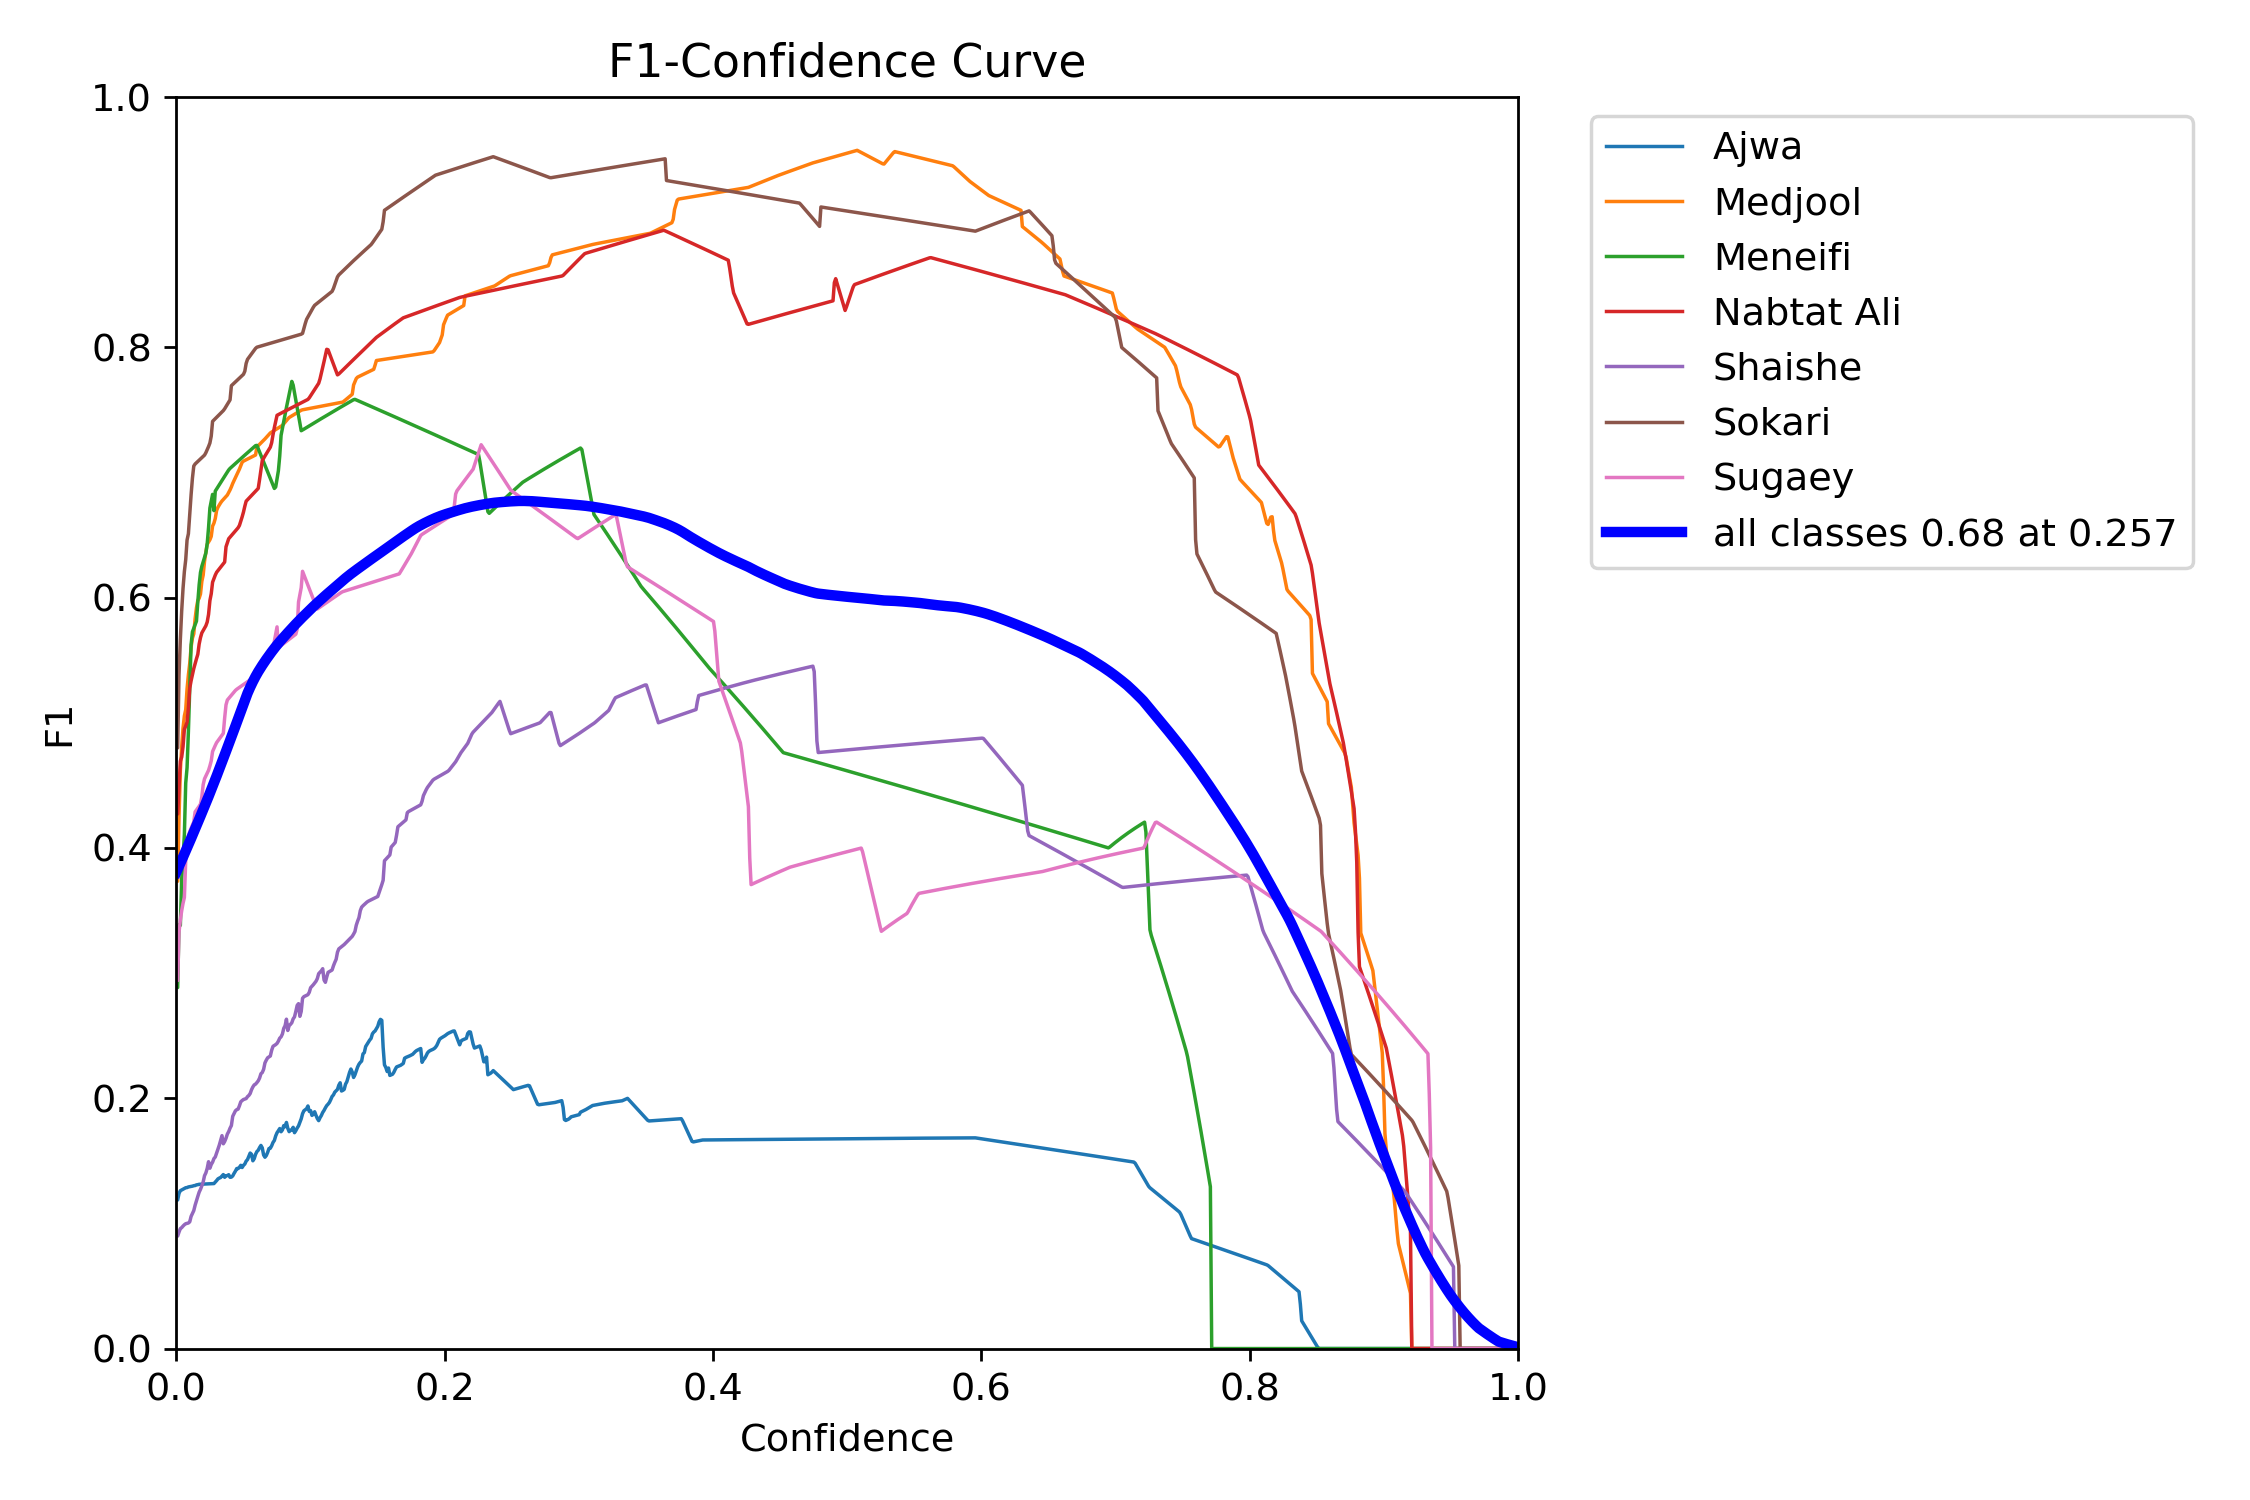

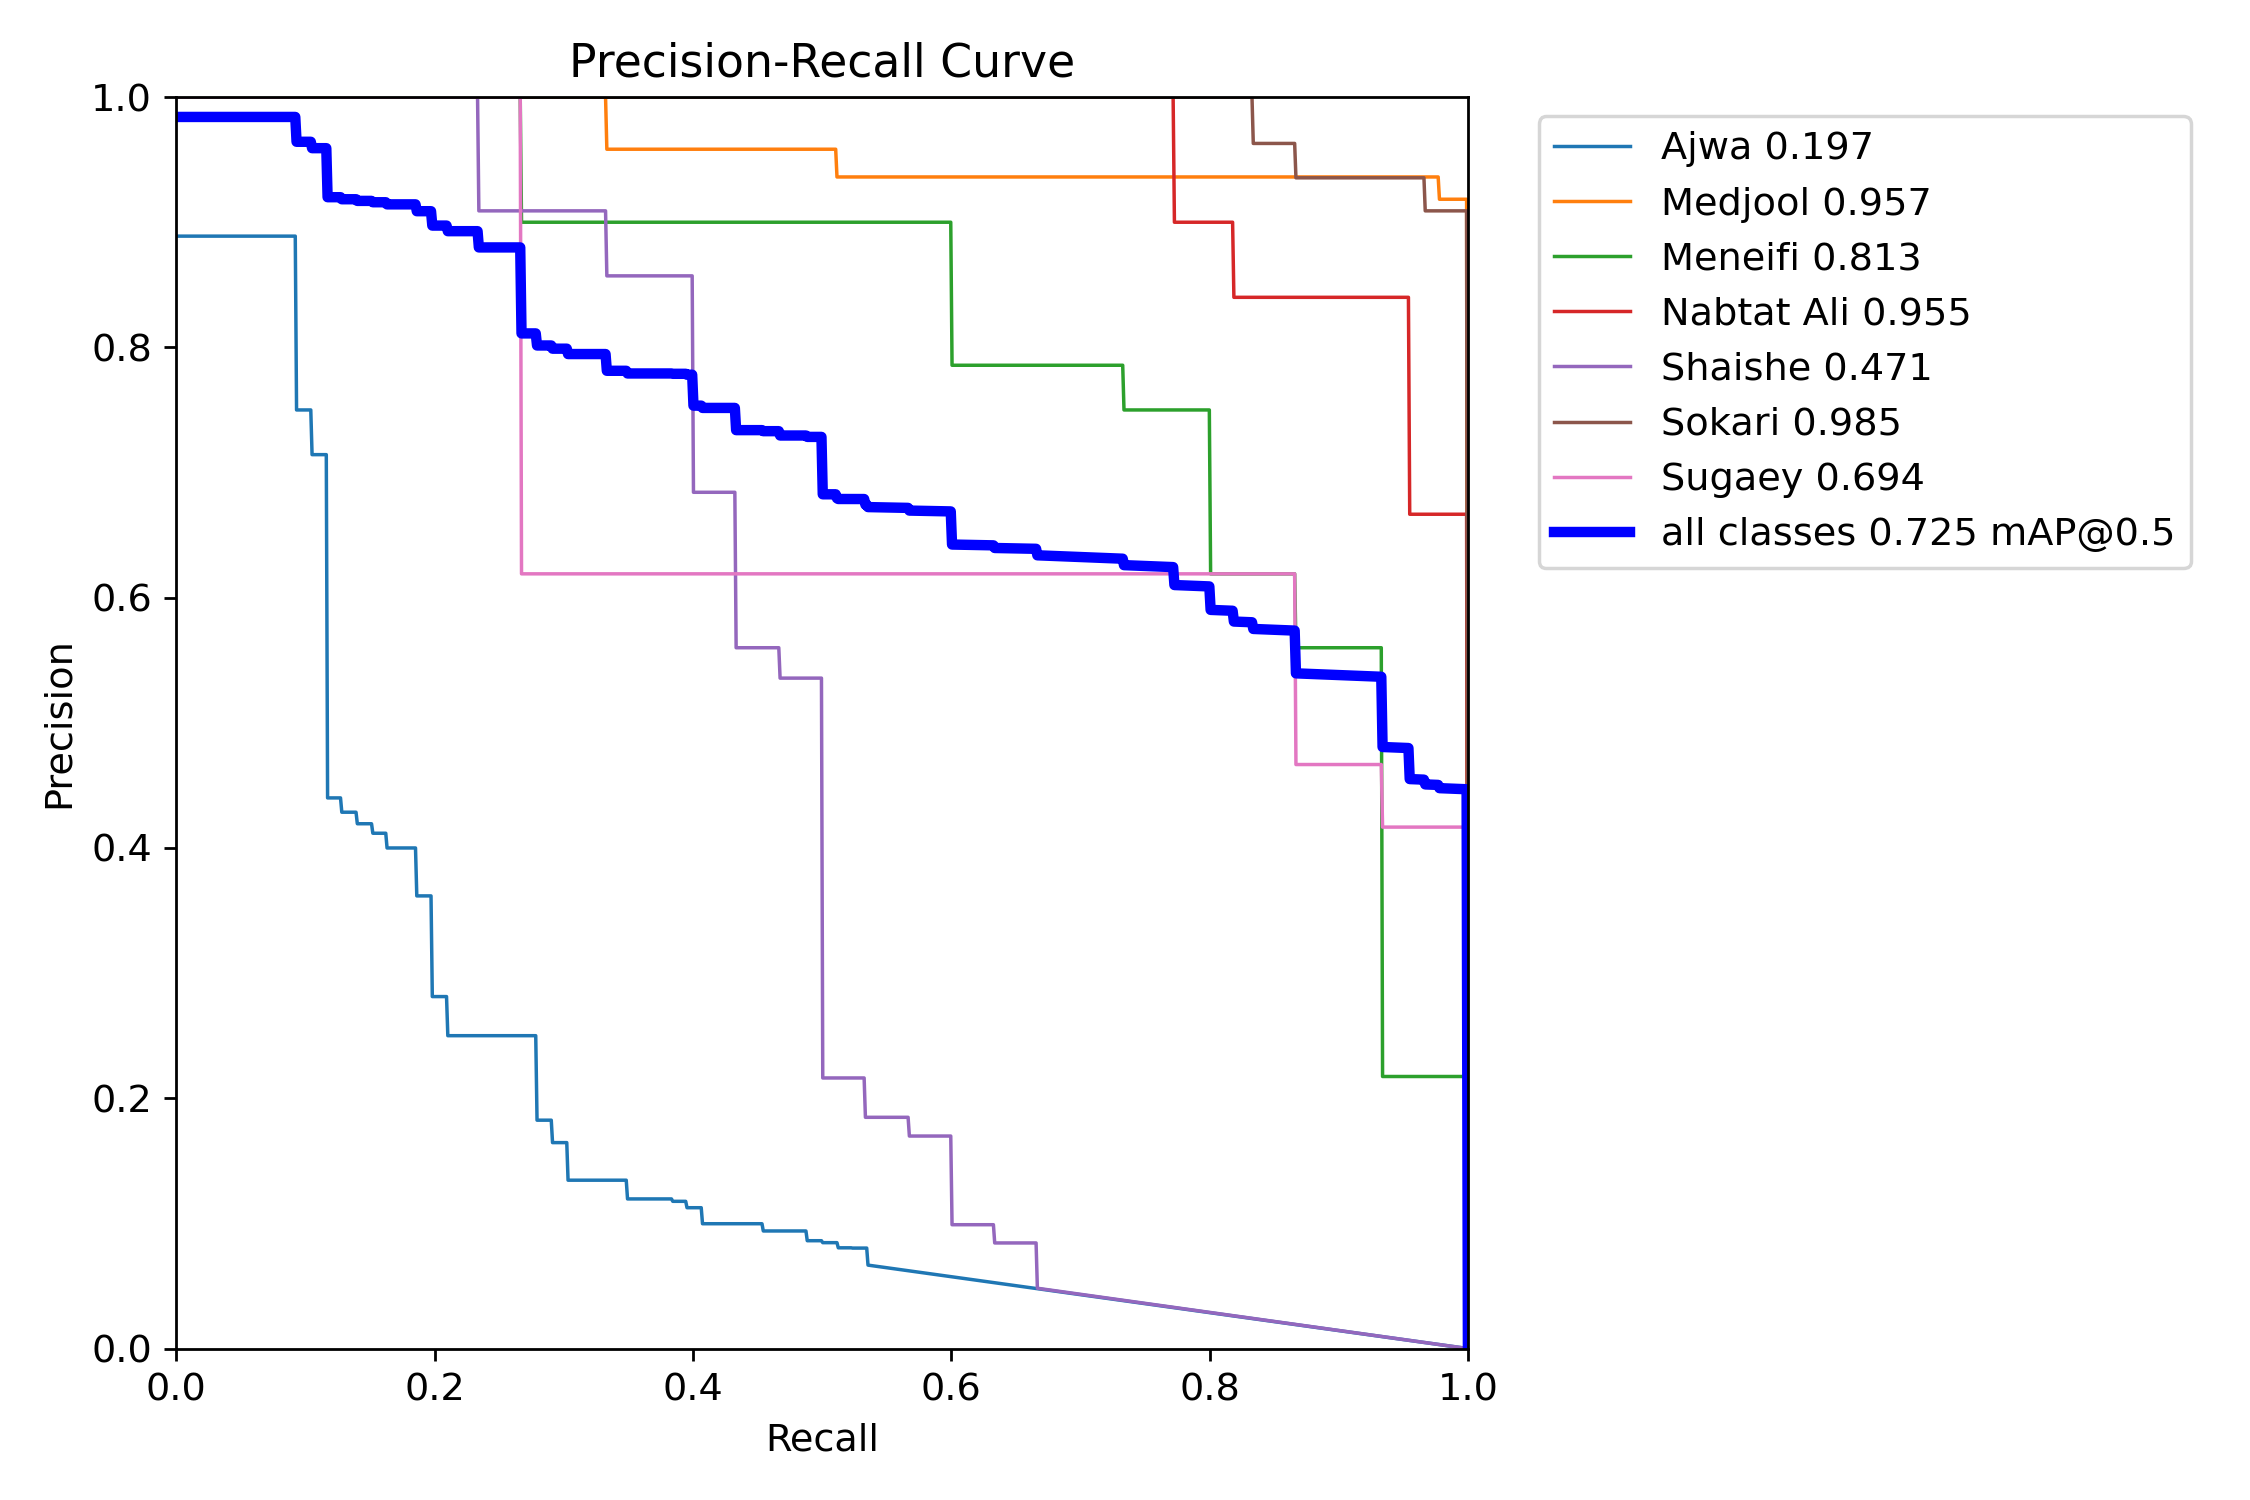

In [51]:
from IPython.display import Image, display
import glob
result_path = 'runs/detect/val18/'  # adjust if your run folder is different

# Show important images

display(Image(filename=result_path + 'F1_curve.png'))
display(Image(filename=result_path + 'PR_curve.png'))